# Effort and cost Estimation in Agile Software Development

In [3]:
#@title Effort Estimation on Maxwell
import math
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.metrics import classification_report

data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/special work/datasets/csv_result-kitchenham.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data_read.head()

,id,Project,Client.code,Project.type,Actual.start.date,Actual.duration,Actual.effort,Adjusted.function.points,Estimated.completion.date,First.estimate,First.estimate.method
0,1,1,1,A,1996-12-10,107,485,101.65,1997-04-15,495,EO
1,2,2,1,D,1997-06-16,144,990,57.12,1997-08-19,1365,A
2,3,3,1,D,1997-03-01,604,13635,1010.88,1998-06-30,8244,EO
3,4,4,1,P,1997-06-23,226,1576,45.60,1998-03-06,1595,D
4,5,5,1,D,1997-01-20,326,3826,1022.58,1998-01-01,3828,A


In [6]:
#@title Defining Category 1 and Category 2

#duration = data_read[{Actual.start.date}-{Estimated.completion.date}]
features = ['Actual.duration'	,'Adjusted.function.points'		,'First.estimate'	]




Cat_1 = data_read[features]
Cat_2 = data_read['Actual.effort']

In [7]:
#For Debugging Purpose
 
##Cat_1=data_read.drop(['Actual_Cost'],axis=1).values
#Cat_1=data_read(db_a).values
#Cat_1=data_read['Effort',	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Team_Salary',	'Act_Time',	'Est_time'].values
##Cat_2=data_read['Actual_Cost'].values



#@title Describing Categorical Data 
Cat_1.describe()


,Actual.duration,Adjusted.function.points,First.estimate
count,145.000000,145.000000,145.000000
mean,206.448276,527.669310,2855.972414
std,134.092005,1521.994936,6789.287453
min,37.000000,15.360000,121.000000
25%,123.000000,126.420000,898.000000
50%,171.000000,260.950000,1750.000000
75%,250.000000,603.580000,2879.000000
max,946.000000,18137.480000,79870.000000


In [8]:
#For debugging purpose
#print(Cat_1)

In [9]:
#@title Describe the raw Data of splitted trained set from the dataframe
display(Cat_1)

,Actual.duration,Adjusted.function.points,First.estimate
0,107,101.65,495
1,144,57.12,1365
2,604,1010.88,8244
3,226,45.60,1595
4,326,1022.58,3828
...,...,...,...
140,253,178.10,865
141,405,81.48,441
142,241,1093.86,2731
143,156,1002.76,1039


In [10]:
print('The overall number of projects are: ',len(Cat_2))

The overall number of projects are:  145


In [11]:
display(Cat_2)

0        485
1        990
2      13635
3       1576
4       3826
       ...  
140      593
141      302
142     2634
143     1040
144      887
Name: Actual.effort, Length: 145, dtype: int64

In [12]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2,test_size=0.20, random_state=0)
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)
ml.predict(x_test)
y_pred1 = ml.predict(x_test)

ypredx=len(x_test)
## For Debugging Purpose


# print(len(y_pred1))
# print('xtrain',len(x_train))
# print('xtest',len(x_test))

In [13]:
import math
print(y_test)


7      1698
24     1143
27     2172
66     2265
73     1884
98      254
62     1252
22     1066
111    4414
26     1868
40     5094
44     5646
129    1832
60     2037
136     955
37     2591
16      580
127    5249
97      219
8      1173
78      502
128    5192
132    1328
83      557
90     2393
33      652
50      726
89     3483
118     570
Name: Actual.effort, dtype: int64


In [14]:
print(y_pred1)

[1514.34665116  752.24065461 1842.19142546 1926.34322338 1646.67400497
 -363.82860709 2053.50658596 1342.61626719 4440.69101419 2132.67179798
 4804.34944149 5783.25160855 3318.02366552 2567.96328392 2991.34150963
 1067.26347848  718.67097921 5080.78636654 -390.71227159  928.10229945
  338.1154948  6162.24158284 1211.89523997  123.82826977 4365.76051877
  168.358332    241.13264726 3366.845455   -415.31962261]


In [15]:
ml.predict(x_train)
x_train_pred_lr= ml.predict(x_train)

In [16]:
from sklearn.metrics import r2_score


import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math




print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred1))

diff=np.absolute(y_test-y_pred1)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#linear effort

The r Score on the predictrd trained Set: 0.76
MMRE 0.5816887885596149
MdMRE 0.2594899316947988
PRED 25% 48.275862068965516


In [17]:

#   diff=np.absolute(y_test-y_pred1)
#   MRE=diff/y_test
#   MMRE=np.mean(MRE)

# print('MMRE :',MMRE)

Text(0.5, 1.0, 'Effort Actual vs Predicted Linear Regresssion')

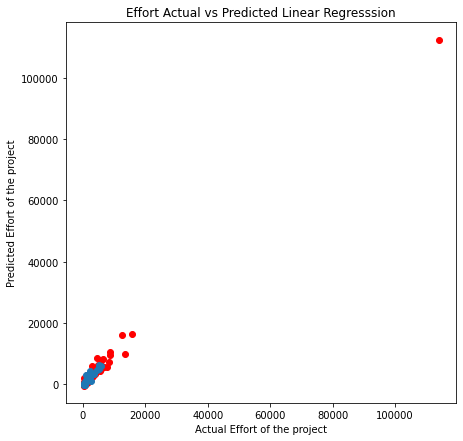

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_train, x_train_pred_lr ,label='Train Data',color='red' )
plt.scatter(y_test, y_pred1)


#plt.scatter()
plt.xlabel('Actual Effort of the project')
plt.ylabel('Predicted Effort of the project')
plt.title('Effort Actual vs Predicted Linear Regresssion')




In [19]:
#ANOTHER SIMILAR GRAPH

In [20]:
##Debugging pur   
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})

# Now calculating Diffrence between actual and predicted Values

In [21]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1})

#print(pred_y_diff.dtypes)
#
#pred_y_diff= pd.DataFrame(range(3), columns=['y_pred1'])
#pred_y_diff.y_pred1 = pred_y_diff.y_pred1.astype(float)


pred_y_diff[0:21]


,Actual Values of Cost,Predicted Cost,Difference
7,1698,1514.346651,183.653349
24,1143,752.240655,390.759345
27,2172,1842.191425,329.808575
66,2265,1926.343223,338.656777
73,1884,1646.674005,237.325995
98,254,-363.828607,617.828607
62,1252,2053.506586,-801.506586
22,1066,1342.616267,-276.616267
111,4414,4440.691014,-26.691014
26,1868,2132.671798,-264.671798


In [22]:
#arr = pred_y_diff.to_numpy()
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})
arr2 =pd.DataFrame({'Difference':y_test-y_pred1})

In [23]:

print(arr)

     Actual  Cost
7            1698
24           1143
27           2172
66           2265
73           1884
98            254
62           1252
22           1066
111          4414
26           1868
40           5094
44           5646
129          1832
60           2037
136           955
37           2591
16            580
127          5249
97            219
8            1173
78            502
128          5192
132          1328
83            557
90           2393
33            652
50            726
89           3483
118           570


In [24]:
print(np.absolute(arr2))

      Difference
7     183.653349
24    390.759345
27    329.808575
66    338.656777
73    237.325995
98    617.828607
62    801.506586
22    276.616267
111    26.691014
26    264.671798
40    289.650559
44    137.251609
129  1486.023666
60    530.963284
136  2036.341510
37   1523.736522
16    138.670979
127   168.213633
97    609.712272
8     244.897701
78    163.884505
128   970.241583
132   116.104760
83    433.171730
90   1972.760519
33    483.641668
50    484.867353
89    116.154545
118   985.319623


In [25]:
arr22= [];
arr11=[];
i=1
k=1
for i in arr:
  xx= arr[i]
  arr22.append(xx)
for k in arr1:
  yy= arr1[k]
  arr11.append(yy)

In [26]:
#print(arr22[0][0])
#print(arr11[0][0])
print(len(arr11))
Diff=[];
i=0
#for i in range(0,5):
   # vv=arr22[0][i]-arr11[0][i]
#    Diff.append(vv)
#    print(vv)

1


In [27]:
#pred_y_diff = pd.DataFrame({'Actual  Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1,'MMRE':1/6((y_test-y_pred1)/y_test) })

In [28]:
# @title KNeiboursRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#print('x_train length :',len(x_train))
x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)
#print(len(y_pred1))
#print('x_train length:',len(x_train))
#print('x_test length:',len(x_test))

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test) 

#print(classification_report(y_test,y_pred))

#predict =neigh.predict(y_pred)
#print(neigh.score(y_test, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error
#

# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred))

diff=np.absolute(y_test-y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)


#KNN EFFORT

The r Score on the predictrd trained Set: 0.72
MMRE 0.3262862825333622
MdMRE 0.12682048764523
PRED 25% 62.06896551724138


In [29]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'MRE':np.abs((y_test-y_pred)/y_test)})


pred_mre[0:145]

,Actual Values of Cost,Predicted Cost,MRE
7,1698,1812.000000,0.067138
24,1143,1012.000000,0.114611
27,2172,2268.666667,0.044506
66,2265,2025.000000,0.105960
73,1884,1980.666667,0.051309
98,254,338.333333,0.332021
62,1252,1778.666667,0.420660
22,1066,1539.000000,0.443715
111,4414,5150.333333,0.166818
26,1868,1853.666667,0.007673


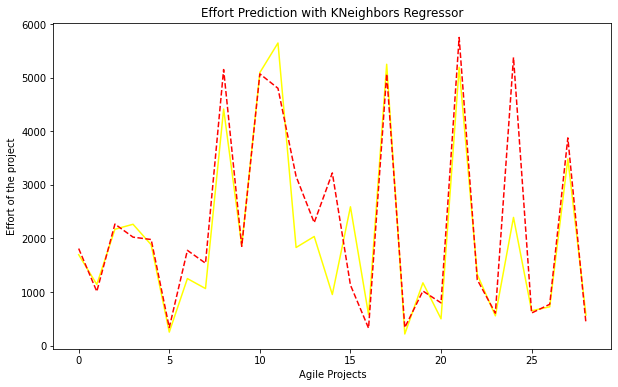

In [30]:
 #plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred , label='Predicted values ' , color='red' , linestyle ='--')

plt.xlabel('Agile Projects')
plt.ylabel('Effort of the project')
plt.title('Effort Prediction with KNeighbors Regressor')
#plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show()

----------------------------

In [31]:
# #@title CALCULATING THE MMRE

# #MAKING THE VALUES ABSOLUTE 
# xyy=pred_mre.MRE.abs()
# Raw_mean = xyy.sum()/len(pred_mre) #Total Projects in the Dataset are 21
# #print('MMRE :',Raw_mean)

# # percentage MMRE 
# print(Raw_mean)
# #print('Percentage MMRE :',Raw_mean*100)

Decision Tree Implementation

## Decision Tree Implementation 

In [32]:
data_read.head()

,id,Project,Client.code,Project.type,Actual.start.date,Actual.duration,Actual.effort,Adjusted.function.points,Estimated.completion.date,First.estimate,First.estimate.method
0,1,1,1,A,1996-12-10,107,485,101.65,1997-04-15,495,EO
1,2,2,1,D,1997-06-16,144,990,57.12,1997-08-19,1365,A
2,3,3,1,D,1997-03-01,604,13635,1010.88,1998-06-30,8244,EO
3,4,4,1,P,1997-06-23,226,1576,45.60,1998-03-06,1595,D
4,5,5,1,D,1997-01-20,326,3826,1022.58,1998-01-01,3828,A


In [33]:
#Now to Prepare the Input and Output Features
# X= data_read.drop(['Actual.Effort'],axis=1)
# X.shape

In [34]:
#Splitting the dataset into Trainingfset and test set

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
#Creating and Fitting the model
regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

In [36]:
#The Coeffitient of Detern=mination 
print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

Training R_sq is : 1.00


In [37]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [38]:
#prediction on the training Dataset
y_train_pred = regressor1.predict(X_train)



In [39]:

# The r_sq
print('The r_sq  is: %.2f'% r2_score(y_train,y_train_pred))

The r_sq  is: 1.00


In [40]:
#prediction on testing the data
y_test_pred_dt = regressor1.predict(X_test)
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_dt))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_dt))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_dt))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 995539.0
Mean Absolute Error:: 766.7241379310345
Root Mean Squared Error:: 997.7670068708426


In [41]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))



The r Score on the predictrd trained Set: 0.61


<function matplotlib.pyplot.show(close=None, block=None)>

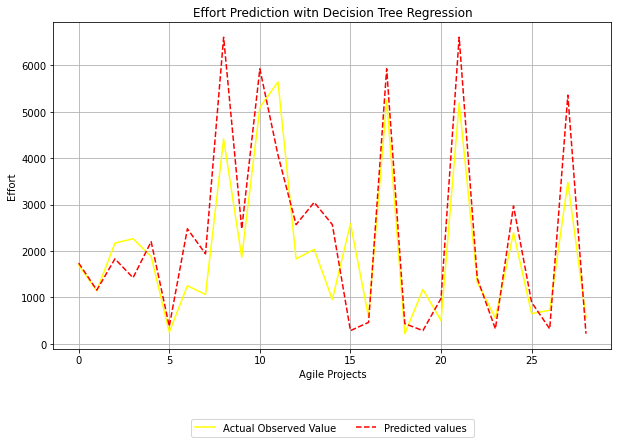

In [42]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_dt , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction witn Decision Tree Regression')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [43]:
pred_mre = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'MRE':(y_test-y_test_pred_dt)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Effort,Predicted Effort,MRE
7,1698,1742.0,-0.025913
24,1143,1159.0,-0.013998
27,2172,1832.0,0.156538
66,2265,1425.0,0.370861
73,1884,2203.0,-0.169321
98,254,380.0,-0.496063
62,1252,2480.0,-0.980831
22,1066,1940.0,-0.819887
111,4414,6607.0,-0.496828
26,1868,2480.0,-0.327623


CALCULATING MRE MMRE MdMRE and PRED 25

In [44]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))

diff=np.absolute(y_test-y_test_pred_dt)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#DT EFFORT

The r Score on the predictrd trained Set: 0.61
MMRE 0.4790386070505955
MdMRE 0.4028384279475983
PRED 25% 31.03448275862069


In [45]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'Difference':y_test-y_test_pred_dt})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
7,1698,1742.0,-44.0
24,1143,1159.0,-16.0
27,2172,1832.0,340.0
66,2265,1425.0,840.0
73,1884,2203.0,-319.0
98,254,380.0,-126.0
62,1252,2480.0,-1228.0
22,1066,1940.0,-874.0
111,4414,6607.0,-2193.0
26,1868,2480.0,-612.0


In [46]:
#@title Random Forest Implementation
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)

In [47]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=30, random_state=30)

In [48]:
#Fitting the  model 
LL_rf = model2.fit(X_train,y_train)


In [49]:
#prediction on testing the data
y_test_pred_rf = model2.predict(X_test)

In [50]:
#Training Model Evaluation


print('The Model Score on the predictrd training Set: %.2f'% LL_rf.score(X_train,y_train))
print('r2 Score ', r2_score(y_test,y_test_pred_rf))

The Model Score on the predictrd training Set: 0.90
r2 Score  0.7437248408725279


In [51]:
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_rf))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_rf))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_rf))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 661129.6508429117
Mean Absolute Error:: 579.0264367816092
Root Mean Squared Error:: 813.0987952536344


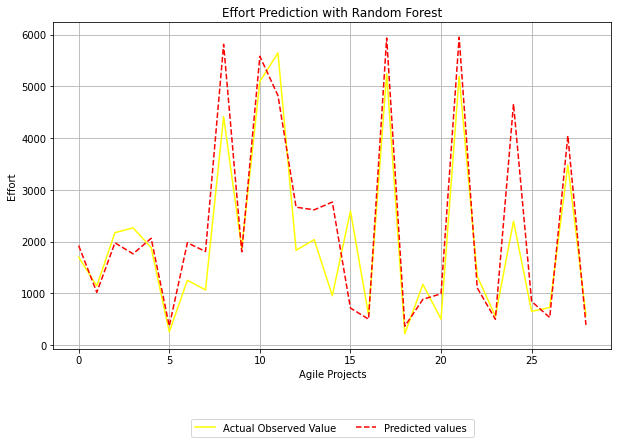

In [52]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_rf , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction with Random Forest')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [53]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred_rf,'MRE':(y_test-y_test_pred_rf)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
7,1698,1922.766667,-0.132371
24,1143,1018.700000,0.108749
27,2172,1976.100000,0.090193
66,2265,1763.066667,0.221604
73,1884,2063.033333,-0.095028
98,254,368.033333,-0.448950
62,1252,1976.866667,-0.578967
22,1066,1807.800000,-0.695872
111,4414,5810.400000,-0.316357
26,1868,1802.733333,0.034939


In [54]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_rf))

diff=np.absolute(y_test-y_test_pred_rf)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)



The r Score on the predictrd trained Set: 0.74
MMRE 0.37497110592161065
MdMRE 0.2461210571184996
PRED 25% 51.724137931034484


In [55]:
#@title CALCULATING THE MMRE

#MAKING THE VALUES ABSOLUTE 
xyy=pred_mre.MRE.abs()
Raw_mean = xyy.sum()/ypredx #Total Projects in the Dataset are 21
print('MMRE :',Raw_mean)

MMRE_RF = Raw_mean*100
# percentage MMRE 
###print(' MMRE in Percentage :',Raw_mean*100,'%')

MMRE : 0.37497110592161065


# Support Vector Machine

In [56]:
#@title Support Vector
#import warnings
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV


# Categorical To continious 
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


svm = SVC(kernel="linear",C=1)
svm.fit(X_train,y_train)

#clf = svm.SVC()
#clf.fit(Cat_1, Cat_2)

y_pred_svm=svm.predict(X_test)
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#
print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred_svm)))

print("Mean Squared Error::",mean_squared_error(y_test,y_pred_svm))
xv= math.sqrt(mean_squared_error(y_test,y_pred_svm))
print("Root Mean Squared Error::",xv)


Mean Absolute error::: 28.057207568675185
Mean Squared Error:: 1611758.448275862
Root Mean Squared Error:: 1269.5504906366907


In [57]:
#prediction on testing the data
#y_test_pred_svm = y_pred111.predict(y_test,y_test_pred_svm)

In [58]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_pred_svm,'Difference':y_test-y_pred_svm})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
7,1698,1557,141
24,1143,1113,30
27,2172,2663,-491
66,2265,1425,840
73,1884,2170,-286
98,254,313,-59
62,1252,2480,-1228
22,1066,1318,-252
111,4414,4068,346
26,1868,1431,437


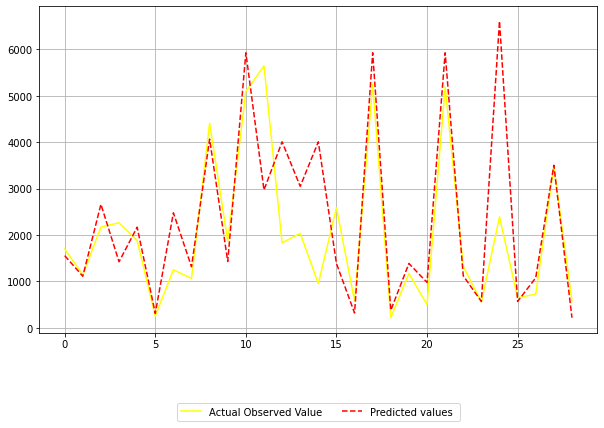

In [59]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred_svm , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()

plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)
plt.show()

In [60]:
#@title  SVM RBF

#@title Support Vector
#import warnings
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV
#!pip install sklearn.preprocessing
from sklearn import preprocessing
#from preprocessing import standardscaler
#from dbn.tensorflow import SupervisedDBNClassification
import tensorflow as tf
frrom common.models.boltzmann import dbn


# ss=standardscaler()
# Cat_1 = ss.fit_transform(Cat_1)

# Categorical To continious 
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


svm = SVR(kernel="rbf",gamma=0.1, C=0.02)
svm.fit(X_train,y_train)

#clf = svm.SVC()
#clf.fit(Cat_1, Cat_2)

y_pred_svm=svm.predict(X_test)



# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred_svm))

diff=np.absolute(y_test-y_pred_svm)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#


ModuleNotFoundError: ignored

In [ ]:
!pip install nolearn
from nolearn.dbn import DBN

clf = DBN(
    [X_train.shape[1], 300, 10],
    learn_rates=0.3,
    learn_rate_decays=0.9,
    epochs=10,
    verbose=1,
    )



In [ ]:
#@title DBN CHECk

"""
"""
from __future__ import print_function, division
import os
import sys
import timeit

import numpy

import theano
import theano.tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams

from logistic_sgd import LogisticRegression, load_data
from mlp import HiddenLayer
from rbm import RBM


# start-snippet-1
class DBN(object):
    # """Deep Belief Network

    # A deep belief network is obtained by stacking several RBMs on top of each
    # other. The hidden layer of the RBM at layer `i` becomes the input of the
    # RBM at layer `i+1`. The first layer RBM gets as input the input of the
    # network, and the hidden layer of the last RBM represents the output. When
    # used for classification, the DBN is treated as a MLP, by adding a logistic
    # regression layer on top.
    # """

    def __init__(self, numpy_rng, theano_rng=None, n_ins=784,
                 hidden_layers_sizes=[500, 500], n_outs=10):
        # """This class is made to support a variable number of layers.

        # :type numpy_rng: numpy.random.RandomState
        # :param numpy_rng: numpy random number generator used to draw initial
        #             weights

        # :type theano_rng: theano.tensor.shared_randomstreams.RandomStreams
        # :param theano_rng: Theano random generator; if None is given one is
        #                    generated based on a seed drawn from `rng`

        # :type n_ins: int
        # :param n_ins: dimension of the input to the DBN

        # :type hidden_layers_sizes: list of ints
        # :param hidden_layers_sizes: intermediate layers size, must contain
        #                        at least one value

        # :type n_outs: int
        # :param n_outs: dimension of the output of the network
        # """

        self.sigmoid_layers = []
        self.rbm_layers = []
        self.params = []
        self.n_layers = len(hidden_layers_sizes)

        assert self.n_layers > 0

        if not theano_rng:
            theano_rng = MRG_RandomStreams(numpy_rng.randint(2 ** 30))

        # allocate symbolic variables for the data

        # the data is presented as rasterized images
        self.x = T.matrix('x')

        # the labels are presented as 1D vector of [int] labels
        self.y = T.ivector('y')
        # end-snippet-1
        # The DBN is an MLP, for which all weights of intermediate
        # layers are shared with a different RBM.  We will first
        # construct the DBN as a deep multilayer perceptron, and when
        # constructing each sigmoidal layer we also construct an RBM
        # that shares weights with that layer. During pretraining we
        # will train these RBMs (which will lead to chainging the
        # weights of the MLP as well) During finetuning we will finish
        # training the DBN by doing stochastic gradient descent on the
        # MLP.

        for i in range(self.n_layers):
            # construct the sigmoidal layer

            # the size of the input is either the number of hidden
            # units of the layer below or the input size if we are on
            # the first layer
            if i == 0:
                input_size = n_ins
            else:
                input_size = hidden_layers_sizes[i - 1]

            # the input to this layer is either the activation of the
            # hidden layer below or the input of the DBN if you are on
            # the first layer
            if i == 0:
                layer_input = self.x
            else:
                layer_input = self.sigmoid_layers[-1].output

            sigmoid_layer = HiddenLayer(rng=numpy_rng,
                                        input=layer_input,
                                        n_in=input_size,
                                        n_out=hidden_layers_sizes[i],
                                        activation=T.nnet.sigmoid)

            # add the layer to our list of layers
            self.sigmoid_layers.append(sigmoid_layer)

            # its arguably a philosophical question...  but we are
            # going to only declare that the parameters of the
            # sigmoid_layers are parameters of the DBN. The visible
            # biases in the RBM are parameters of those RBMs, but not
            # of the DBN.
            self.params.extend(sigmoid_layer.params)

            # Construct an RBM that shared weights with this layer
            rbm_layer = RBM(numpy_rng=numpy_rng,
                            theano_rng=theano_rng,
                            input=layer_input,
                            n_visible=input_size,
                            n_hidden=hidden_layers_sizes[i],
                            W=sigmoid_layer.W,
                            hbias=sigmoid_layer.b)
            self.rbm_layers.append(rbm_layer)

        # We now need to add a logistic layer on top of the MLP
        self.logLayer = LogisticRegression(
            input=self.sigmoid_layers[-1].output,
            n_in=hidden_layers_sizes[-1],
            n_out=n_outs)
        self.params.extend(self.logLayer.params)

        # compute the cost for second phase of training, defined as the
        # negative log likelihood of the logistic regression (output) layer
        self.finetune_cost = self.logLayer.negative_log_likelihood(self.y)

        # compute the gradients with respect to the model parameters
        # symbolic variable that points to the number of errors made on the
        # minibatch given by self.x and self.y
        self.errors = self.logLayer.errors(self.y)

    def pretraining_functions(self, train_set_x, batch_size, k):
        '''Generates a list of functions, for performing one step of
        gradient descent at a given layer. The function will require
        as input the minibatch index, and to train an RBM you just
        need to iterate, calling the corresponding function on all
        minibatch indexes.

        :type train_set_x: theano.tensor.TensorType
        :param train_set_x: Shared var. that contains all datapoints used
                            for training the RBM
        :type batch_size: int
        :param batch_size: size of a [mini]batch
        :param k: number of Gibbs steps to do in CD-k / PCD-k

        '''

        # index to a [mini]batch
        index = T.lscalar('index')  # index to a minibatch
        learning_rate = T.scalar('lr')  # learning rate to use

        # begining of a batch, given `index`
        batch_begin = index * batch_size
        # ending of a batch given `index`
        batch_end = batch_begin + batch_size

        pretrain_fns = []
        for rbm in self.rbm_layers:

            # get the cost and the updates list
            # using CD-k here (persisent=None) for training each RBM.
            # TODO: change cost function to reconstruction error
            cost, updates = rbm.get_cost_updates(learning_rate,
                                                 persistent=None, k=k)

            # compile the theano function
            fn = theano.function(
                inputs=[index, theano.In(learning_rate, value=0.1)],
                outputs=cost,
                updates=updates,
                givens={
                    self.x: train_set_x[batch_begin:batch_end]
                }
            )
            # append `fn` to the list of functions
            pretrain_fns.append(fn)

        return pretrain_fns

    def build_finetune_functions(self, datasets, batch_size, learning_rate):
        '''Generates a function `train` that implements one step of
        finetuning, a function `validate` that computes the error on a
        batch from the validation set, and a function `test` that
        computes the error on a batch from the testing set

        :type datasets: list of pairs of theano.tensor.TensorType
        :param datasets: It is a list that contain all the datasets;
                        the has to contain three pairs, `train`,
                        `valid`, `test` in this order, where each pair
                        is formed of two Theano variables, one for the
                        datapoints, the other for the labels
        :type batch_size: int
        :param batch_size: size of a minibatch
        :type learning_rate: float
        :param learning_rate: learning rate used during finetune stage

        '''

        (train_set_x, train_set_y) = datasets[0]
        (valid_set_x, valid_set_y) = datasets[1]
        (test_set_x, test_set_y) = datasets[2]

        # compute number of minibatches for training, validation and testing
        n_valid_batches = valid_set_x.get_value(borrow=True).shape[0]
        n_valid_batches //= batch_size
        n_test_batches = test_set_x.get_value(borrow=True).shape[0]
        n_test_batches //= batch_size

        index = T.lscalar('index')  # index to a [mini]batch

        # compute the gradients with respect to the model parameters
        gparams = T.grad(self.finetune_cost, self.params)

        # compute list of fine-tuning updates
        updates = []
        for param, gparam in zip(self.params, gparams):
            updates.append((param, param - gparam * learning_rate))

        train_fn = theano.function(
            inputs=[index],
            outputs=self.finetune_cost,
            updates=updates,
            givens={
                self.x: train_set_x[
                    index * batch_size: (index + 1) * batch_size
                ],
                self.y: train_set_y[
                    index * batch_size: (index + 1) * batch_size
                ]
            }
        )

        test_score_i = theano.function(
            [index],
            self.errors,
            givens={
                self.x: test_set_x[
                    index * batch_size: (index + 1) * batch_size
                ],
                self.y: test_set_y[
                    index * batch_size: (index + 1) * batch_size
                ]
            }
        )

        valid_score_i = theano.function(
            [index],
            self.errors,
            givens={
                self.x: valid_set_x[
                    index * batch_size: (index + 1) * batch_size
                ],
                self.y: valid_set_y[
                    index * batch_size: (index + 1) * batch_size
                ]
            }
        )

        # Create a function that scans the entire validation set
        def valid_score():
            return [valid_score_i(i) for i in range(n_valid_batches)]

        # Create a function that scans the entire test set
        def test_score():
            return [test_score_i(i) for i in range(n_test_batches)]

        return train_fn, valid_score, test_score


def test_DBN(finetune_lr=0.1, pretraining_epochs=100,
             pretrain_lr=0.01, k=1, training_epochs=1000,
             dataset='mnist.pkl.gz', batch_size=10):
    """
    Demonstrates how to train and test a Deep Belief Network.

    This is demonstrated on MNIST.

    :type finetune_lr: float
    :param finetune_lr: learning rate used in the finetune stage
    :type pretraining_epochs: int
    :param pretraining_epochs: number of epoch to do pretraining
    :type pretrain_lr: float
    :param pretrain_lr: learning rate to be used during pre-training
    :type k: int
    :param k: number of Gibbs steps in CD/PCD
    :type training_epochs: int
    :param training_epochs: maximal number of iterations ot run the optimizer
    :type dataset: string
    :param dataset: path the the pickled dataset
    :type batch_size: int
    :param batch_size: the size of a minibatch
    """

    datasets = load_data(dataset)

    train_set_x, train_set_y = datasets[0]
    valid_set_x, valid_set_y = datasets[1]
    test_set_x, test_set_y = datasets[2]

    # compute number of minibatches for training, validation and testing
    n_train_batches = train_set_x.get_value(borrow=True).shape[0] // batch_size

    # numpy random generator
    numpy_rng = numpy.random.RandomState(123)
    print('... building the model')
    # construct the Deep Belief Network
    dbn = DBN(numpy_rng=numpy_rng, n_ins=28 * 28,
              hidden_layers_sizes=[1000, 1000, 1000],
              n_outs=10)

    # start-snippet-2
    #########################
    # PRETRAINING THE MODEL #
    #########################
    print('... getting the pretraining functions')
    pretraining_fns = dbn.pretraining_functions(train_set_x=train_set_x,
                                                batch_size=batch_size,
                                                k=k)

    print('... pre-training the model')
    start_time = timeit.default_timer()
    # Pre-train layer-wise
    for i in range(dbn.n_layers):
        # go through pretraining epochs
        for epoch in range(pretraining_epochs):
            # go through the training set
            c = []
            for batch_index in range(n_train_batches):
                c.append(pretraining_fns[i](index=batch_index,
                                            lr=pretrain_lr))
            print('Pre-training layer %i, epoch %d, cost ' % (i, epoch), end=' ')
            print(numpy.mean(c, dtype='float64'))

    end_time = timeit.default_timer()
    # end-snippet-2
    print('The pretraining code for file ' + os.path.split(__file__)[1] +
          ' ran for %.2fm' % ((end_time - start_time) / 60.), file=sys.stderr)
    ########################
    # FINETUNING THE MODEL #
    ########################

    # get the training, validation and testing function for the model
    print('... getting the finetuning functions')
    train_fn, validate_model, test_model = dbn.build_finetune_functions(
        datasets=datasets,
        batch_size=batch_size,
        learning_rate=finetune_lr
    )

    print('... finetuning the model')
    # early-stopping parameters

    # look as this many examples regardless
    patience = 4 * n_train_batches

    # wait this much longer when a new best is found
    patience_increase = 2.

    # a relative improvement of this much is considered significant
    improvement_threshold = 0.995

    # go through this many minibatches before checking the network on
    # the validation set; in this case we check every epoch
    validation_frequency = min(n_train_batches, patience / 2)

    best_validation_loss = numpy.inf
    test_score = 0.
    start_time = timeit.default_timer()

    done_looping = False
    epoch = 0

    while (epoch < training_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in range(n_train_batches):

            train_fn(minibatch_index)
            iter = (epoch - 1) * n_train_batches + minibatch_index

            if (iter + 1) % validation_frequency == 0:

                validation_losses = validate_model()
                this_validation_loss = numpy.mean(validation_losses, dtype='float64')
                print('epoch %i, minibatch %i/%i, validation error %f %%' % (
                    epoch,
                    minibatch_index + 1,
                    n_train_batches,
                    this_validation_loss * 100.
                    )
                )

                # if we got the best validation score until now
                if this_validation_loss < best_validation_loss:

                    # improve patience if loss improvement is good enough
                    if (this_validation_loss < best_validation_loss *
                            improvement_threshold):
                        patience = max(patience, iter * patience_increase)

                    # save best validation score and iteration number
                    best_validation_loss = this_validation_loss
                    best_iter = iter

                    # test it on the test set
                    test_losses = test_model()
                    test_score = numpy.mean(test_losses, dtype='float64')
                    print(('     epoch %i, minibatch %i/%i, test error of '
                           'best model %f %%') %
                          (epoch, minibatch_index + 1, n_train_batches,
                          test_score * 100.))

            if patience <= iter:
                done_looping = True
                break

    end_time = timeit.default_timer()
    print(('Optimization complete with best validation score of %f %%, '
           'obtained at iteration %i, '
           'with test performance %f %%'
           ) % (best_validation_loss * 100., best_iter + 1, test_score * 100.))
    print('The fine tuning code for file ' + os.path.split(__file__)[1] +
          ' ran for %.2fm' % ((end_time - start_time) / 60.), file=sys.stderr)


if __name__ == '__main__':
    test_DBN()

In [ ]:
#@title Decision tree
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# data_read = pd.read_csv('Zia_upd22.csv')

# X = data_read.iloc[:,0:8].values
# y = data_read.iloc[:,:-1].values
# regressor = DecisionTreeRegressor(random_state =0)
# regressor.fit(X, y)




In [ ]:
# # @title Let Us calculate Estimated Cost With Raw Data
# x=regressor.predict([[154,4.2,0.77,2.7,12,22,310000,63]])
# print("Estimated Cost:",x[0]*100000)



In [ ]:
# #@title Decision Tree Regression 
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# #data_read = pd.read_csv('Zia_upd22.csv')

# #X = data_read.iloc[:,1:8].values
# #y = data_read.iloc[:,-1].values
# #X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20 )



In [ ]:
# X.shape

In [ ]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
# regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

#coefficient of determination 
# print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

In [ ]:
# For the training model EVALUATION
# from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [ ]:
#Prediction on the training dataset
y_train_pred= regressor1.predict(X_train)
#y_train= regressor1.predict(X_train)

In [ ]:
# The r_sq
# print('The r_sq ,is :',r2_score(y_train,y_train_pred))

In [ ]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_train,y_train_pred))

In [ ]:
  # MSE 
  print('The MSE is :  ', mean_squared_error(y_train,y_train_pred))

In [ ]:
# RMSE 
print('The RMSE is :', np.sqrt(mean_squared_error(y_train,y_train_pred)))

In [ ]:
#Prediction on the testing Data
y_test_pred = regressor1.predict(X_test)
y_test = regressor1.predict(X_test)

Now Calculating r_score 

In [ ]:
# The r_sq
print('The r_sq y_test , y_test_pred is: %.2f'% r2_score(y_test,y_test_pred))

In [ ]:
# # plotting the observed and predicted values 


# # Setting the boundaries and parameters

# plt.rcParams['figure.figsize'] = (10,6)
# x_ax =range(len(X_test))

# #plotting 
# plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
# plt.plot(x_ax,y_test_pred , label='Predicted values ' , color='red' , linestyle ='--')
# plt.grid()
# plt.ylabel('dcscfvfdscd')
# plt.xlabel('fffdcdcscfvfdscd')
# plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [ ]:
from yellowbrick.regressor import PredictionError 
visualizer = PredictionError(regressor1)
visualizer.fit(X_train, y_train)
visualizer.fit(X_test,y_test)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_test,y_test_pred ))

In [ ]:
#pip install yellowbrick

In [ ]:
# Residuals plot 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor1)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
# testing the Model Evaluation



In [ ]:
# MAE 
print('The MAE is :%.2f'% mean_absolute_error(y_test,y_test_pred))

In [ ]:
# The MSE 
print('The MSE is : %.2f'% mean_squared_error(y_test,y_test_pred))

In [ ]:
print('The RMSE is : %.2f'% np.sqrt(mean_squared_error(y_test,y_test_pred)))

In [ ]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score

In [ ]:
#On the training Dataset
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(regressor1,X_train,y_train,scoring = 'neg_mean_squared_error' , cv= 10)

In [ ]:
score_train

In [ ]:
score_train = np.mean(score_train)
print(score_train)

In [ ]:
# To make make it Positivme 
from numpy import absolute
score_train = absolute(score_train)
score_train

In [ ]:
# CV on thee testing data 
score_test = cross_val_score(regressor1, X_test, y_test, scoring ='neg_mean_squared_error' , cv= 5)

In [ ]:
print(score_test)

In [ ]:
#The Mean sCORE 
score_test = np.mean(score_test)
score_test

In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred,'Difference':y_test-y_test_pred})

pred_y_diff[0:21]

# Random Forest Regression

In [ ]:
# Let us first import The

